In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("developer_weekly_productivity_dataset.csv")

In [3]:
df

,Developer_ID,Experience_Years,Avg_Tasks_Per_Week,Avg_Bugs_Per_Week,Commits_Per_Week,Meetings_Per_Week,Code_Review_Score,Project_Familiarity_Percent,Bug_Fix_Success_Rate,Overtime_Hours_Per_Week,Role_Level,Team_Size,Productivity_Score
0,Dev001,7,15,4,38,4,9,88,75,4,Senior,7,198
1,Dev002,4,3,1,28,6,6,54,75,0,Junior,11,143
2,Dev003,8,18,3,26,4,8,50,90,9,Mid,14,185
3,Dev004,5,9,1,9,6,10,62,84,6,Senior,7,119
4,Dev005,7,7,4,37,7,7,70,72,9,Mid,8,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Dev396,1,13,3,16,4,10,56,99,8,Junior,11,145
396,Dev397,2,5,0,17,3,8,84,78,5,Junior,5,134
397,Dev398,6,3,2,29,7,5,77,71,4,Junior,14,141
398,Dev399,9,8,2,23,4,10,63,67,8,Mid,5,164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
Developer_ID                   400 non-null object
Experience_Years               400 non-null int64
Avg_Tasks_Per_Week             400 non-null int64
Avg_Bugs_Per_Week              400 non-null int64
Commits_Per_Week               400 non-null int64
Meetings_Per_Week              400 non-null int64
Code_Review_Score              400 non-null int64
Project_Familiarity_Percent    400 non-null int64
Bug_Fix_Success_Rate           400 non-null int64
Overtime_Hours_Per_Week        400 non-null int64
Role_Level                     400 non-null object
Team_Size                      400 non-null int64
Productivity_Score             400 non-null int64
dtypes: int64(11), object(2)
memory usage: 40.8+ KB


In [5]:
le = LabelEncoder()
df['Role_Level'] = le.fit_transform(df['Role_Level'])

In [6]:
#df = df.drop(columns=['Developer_ID'])
df['Developer_ID'] = df['Developer_ID'].str.extract('(\d+)').astype('int64')

In [7]:
df

,Developer_ID,Experience_Years,Avg_Tasks_Per_Week,Avg_Bugs_Per_Week,Commits_Per_Week,Meetings_Per_Week,Code_Review_Score,Project_Familiarity_Percent,Bug_Fix_Success_Rate,Overtime_Hours_Per_Week,Role_Level,Team_Size,Productivity_Score
0,1,7,15,4,38,4,9,88,75,4,2,7,198
1,2,4,3,1,28,6,6,54,75,0,0,11,143
2,3,8,18,3,26,4,8,50,90,9,1,14,185
3,4,5,9,1,9,6,10,62,84,6,2,7,119
4,5,7,7,4,37,7,7,70,72,9,1,8,148
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1,13,3,16,4,10,56,99,8,0,11,145
396,397,2,5,0,17,3,8,84,78,5,0,5,134
397,398,6,3,2,29,7,5,77,71,4,0,14,141
398,399,9,8,2,23,4,10,63,67,8,1,5,164


In [8]:
X = df.drop("Productivity_Score", axis=1)
y = df["Productivity_Score"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
print(corr)
#plt.figure(figsize=(10, 6))
#sns.heatmap(corr[['Productivity_Score']].sort_values(by='Productivity_Score', ascending=False), annot=True)

                             Developer_ID  Experience_Years  \
Developer_ID                     1.000000         -0.029815   
Experience_Years                -0.029815          1.000000   
Avg_Tasks_Per_Week              -0.012483         -0.025709   
Avg_Bugs_Per_Week               -0.014176          0.046899   
Commits_Per_Week                -0.046227          0.043007   
Meetings_Per_Week               -0.006770         -0.057383   
Code_Review_Score                0.096811         -0.081011   
Project_Familiarity_Percent      0.008930         -0.003882   
Bug_Fix_Success_Rate             0.044998         -0.073188   
Overtime_Hours_Per_Week          0.004271          0.117174   
Role_Level                      -0.065217         -0.023442   
Team_Size                       -0.024035         -0.052908   
Productivity_Score              -0.051423          0.185643   

                             Avg_Tasks_Per_Week  Avg_Bugs_Per_Week  \
Developer_ID                          -0.012483

In [13]:
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.8394625011989049
MSE: 191.70161500000003


In [14]:
importances = model.feature_importances_
feature_names = X.columns


In [15]:
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


Feature Importances:
                        Feature  Importance
4              Commits_Per_Week    0.440515
2            Avg_Tasks_Per_Week    0.293347
8          Bug_Fix_Success_Rate    0.059117
3             Avg_Bugs_Per_Week    0.036864
7   Project_Familiarity_Percent    0.034335
0                  Developer_ID    0.024521
1              Experience_Years    0.023850
6             Code_Review_Score    0.023374
9       Overtime_Hours_Per_Week    0.020685
5             Meetings_Per_Week    0.019448
11                    Team_Size    0.016861
10                   Role_Level    0.007084


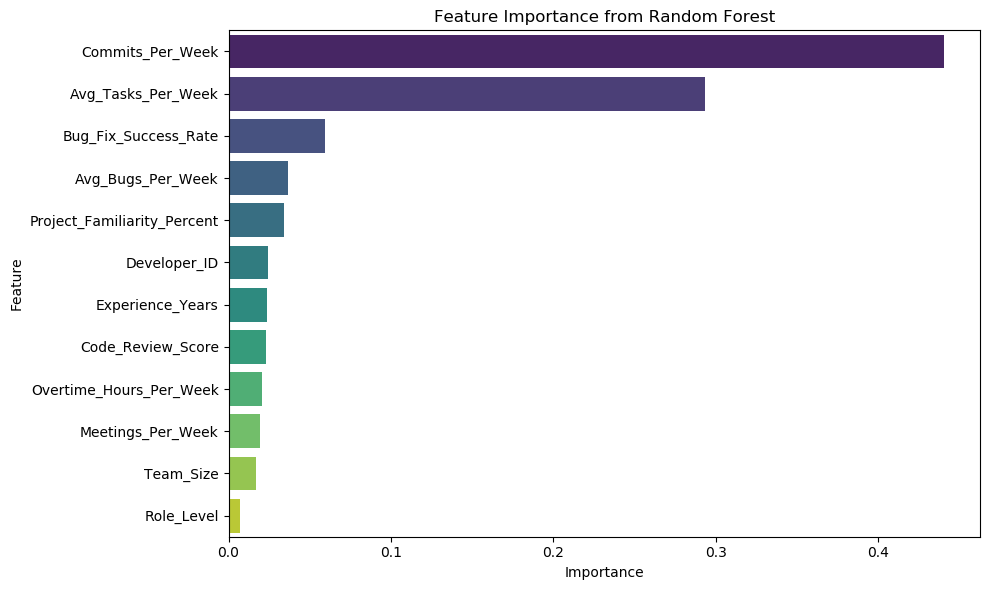

In [16]:
print("\nFeature Importances:")
print(importance_df)

# 11. Plot Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()